In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt

##### READ THE DATASET

In [3]:
data=pd.read_csv("webmd.csv")

In [4]:
data.head(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


#### Preprocessing

In [6]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [7]:
data.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [8]:
data.Reviews.unique()

array(["I'm a retired physician and of all the meds I have tried for my allergies (seasonal and not) - this one is the most effective for me.  When I first began using this drug some years ago - tiredness as a problem but is not currently.",
       'cleared me right up even with my throat hurting it went away after taking the medicine',
       'why did my PTINR go from a normal of 2.5 to over \n100?', ...,
       "As long as I was on chantix, I didn't smoke.  Terrible stomach upset after each dose, constipation, headaches constantly, crazy dreams and mood swings.  I have had to stop taking it and have found other ways to stop smoking.",
       "Started this medication Oct 5th 2008. Haven't smoked for 6 weeks and planning on the full 12 weeks program.  I have had some problems like getting sick after the meds but accually it helps because everytime I see a smoker or smell smoke I get sick, still want one but it offsets it.",
       "One year ago, I tried Chantix and had to stop taking i

In [9]:
data.dropna(inplace=True)

In [10]:
data.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

##### CHECKING DUPLICATES

In [11]:
data[data.duplicated()].shape

(943, 12)

In [12]:
data[data.duplicated()]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
12102,55-64,High Blood Pressure,5/22/2013,lisinopril solution,6873,5,5,,5,Male,"Dizziness , lightheadedness , tiredness, or ...",0
17120,55-64,High Blood Pressure,5/22/2013,lisinopril,6873,5,5,,5,Male,"Dizziness , lightheadedness , tiredness, or ...",0
21816,75 or over,Other,9/6/2015,lucentis vial,144667,1,1,My father was in end stage Macular degenration...,1,Male,Mild discomfort and increased tears may occur ...,0
22427,35-44,Abnormally Long or Heavy Periods,8/22/2019,larin fe,165169,4,4,Tired and nauseous the first week taking Larin...,4,Female,"Nausea , vomiting , headache , bloating , ...",0
24302,25-34,Fungal Infection of Fingernails - Onychomycosis,8/3/2019,lamisil tablet,12422,2,2,Had a rare-ish fungal infection starting at th...,1,,Diarrhea or stomach upset may occur.,0
...,...,...,...,...,...,...,...,...,...,...,...,...
339647,55-64,Diverticulitis,8/9/2019,cipro,1124,1,3,Helped ease Diverticulitis pain when combined...,1,Female,"Nausea , diarrhea , dizziness , lightheaded...",0
339648,55-64,Diverticulitis,8/9/2019,"cipro suspension, microcapsule reconstituted",1124,1,3,Helped ease Diverticulitis pain when combined...,1,Female,"Nausea , diarrhea , dizziness , lightheaded...",0
343090,25-34,Excessive Sweating,9/20/2019,clonidine hcl er,11754,5,5,Medication did exactly what I needed it to do....,5,Male,"Dizziness , lightheadedness , drowsiness, tir...",0
343390,25-34,Excessive Sweating,9/20/2019,clonidine hcl,11754,5,5,Medication did exactly what I needed it to do....,5,Male,"Dizziness , lightheadedness , drowsiness, dr...",0


In [13]:
data=data.drop_duplicates()

In [14]:
data[data.duplicated()].shape

(0, 12)

##### CHECKING OUTLIERS

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

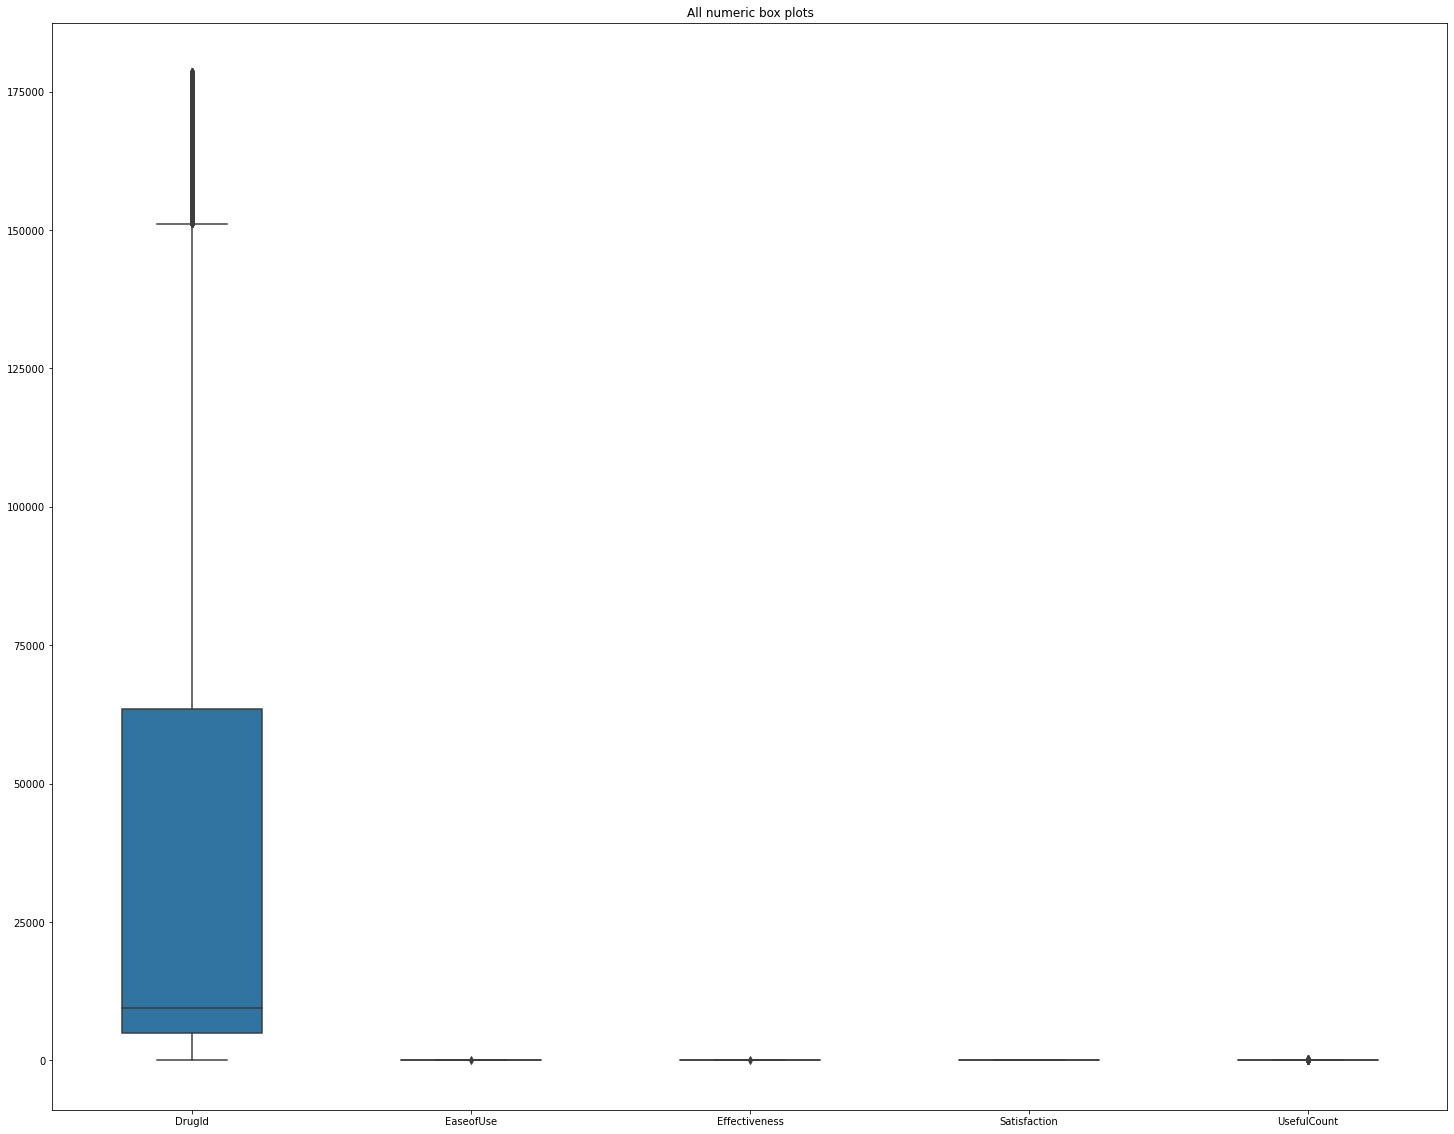

In [16]:
plt.figure(figsize=(25,20))
sns.boxplot(data=data.select_dtypes(include = ['int64']),width=0.5)
plt.title('All numeric box plots')
plt.show()